<a href="https://colab.research.google.com/github/gaganmathur99/Heart-Disease-Prediction/blob/master/Predicting_Heart_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Basic
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
import warnings
warnings.filterwarnings('ignore')

# Other libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [0]:
url="https://raw.githubusercontent.com/gaganmathur99/Heart-Disease-Prediction/master/heart.csv"

In [0]:
data = pd.read_csv(url)

In [270]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [271]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Let's look at some Plots to learn more about data

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,  0.,  4.,
         0.,  0.,  0.,  2.,  0.,  3.,  0.,  4.,  0.,  3.,  0.,  0., 10.,
         0.,  8.,  0.,  8.,  0., 11.,  0.,  8.,  0.,  7.,  0.,  5.,  0.,
         7.,  0.,  5.,  0.,  7.,  0., 12.,  0., 13.,  0.,  0.,  8.,  0.,
        16.,  0.,  8.,  0., 11.,  0., 17.,  0., 19.,  0., 14.,  0., 11.,
         0.,  8.,  0., 11.,  0.,  9.,  0., 10.,  0.,  0.,  8.,  0.,  7.,
         0.,  9.,  0.,  4.,  0.,  3.,  0.,  4.,  0.,  3.,  0.,  0.,  0.,
         0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  1.]),
 array([29.  , 29.48, 29.96, 30.44, 30.92, 31.4 , 31.88, 32.36, 32.84,
        33.32, 33.8 , 34.28, 34.76, 35.24, 35.72, 36.2 , 36.68, 37.16,
        37.64, 38.12, 38.6 , 39.08, 39.56, 40.04, 40.52, 41.  , 41.48,
        41.96, 42.44, 42.92, 43.4 , 43.88, 44.36, 44.84, 45.32, 45.8 ,
        46.28, 46.76, 47.24, 47.72, 48.2 , 48.68, 49.16, 49.64, 50.12,
        50.6 , 51.08, 51.56, 52.04, 52.52, 53.  , 53.48, 53.96, 54.44,
        

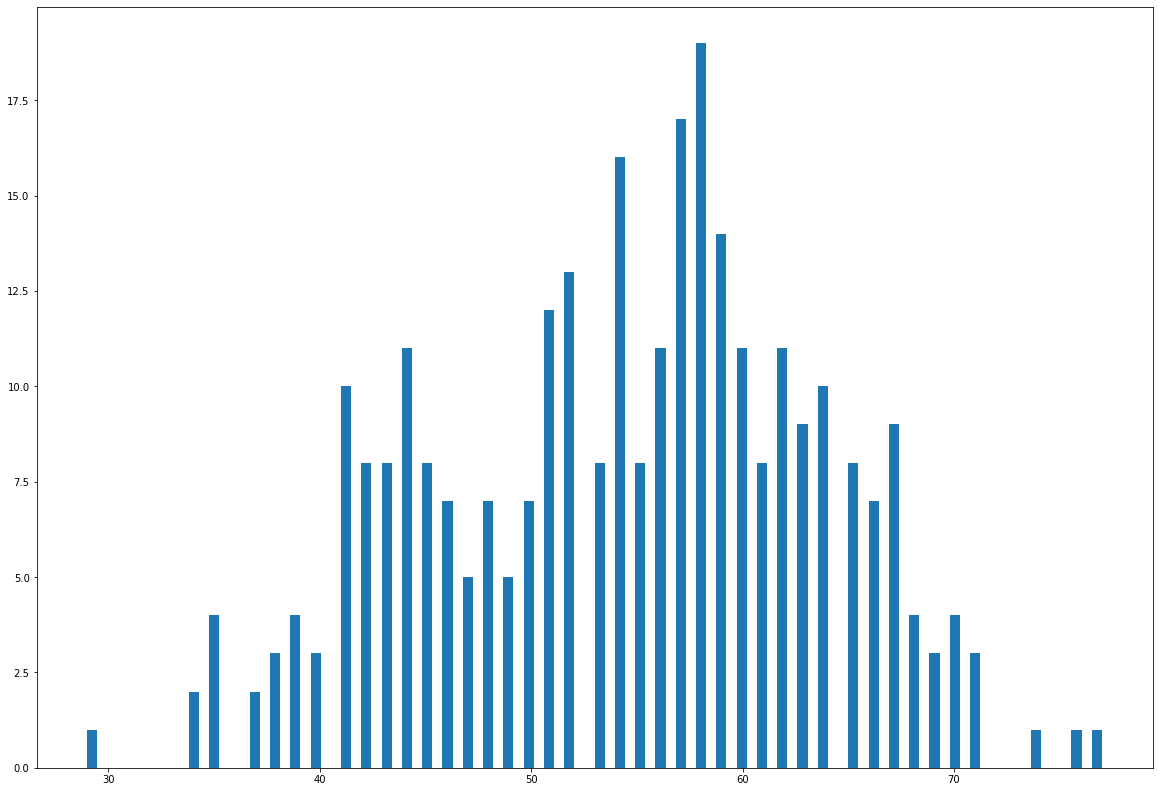

In [272]:
plt.hist(data['age'],bins=100)

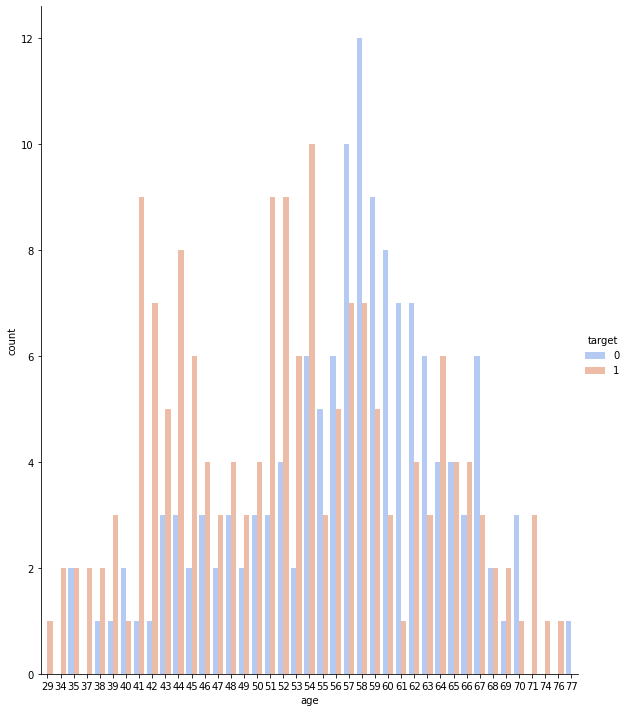

In [273]:
sns.factorplot('age', kind='count' , hue='target', data=data, palette='coolwarm', height=10, aspect=.8)

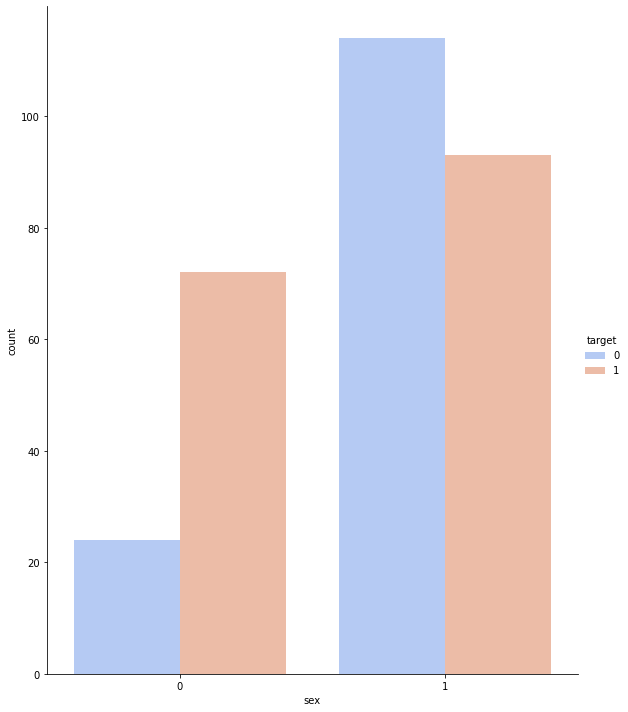

In [274]:
sns.factorplot('sex', kind='count' , hue='target', data=data, palette='coolwarm', height=10, aspect=.8)

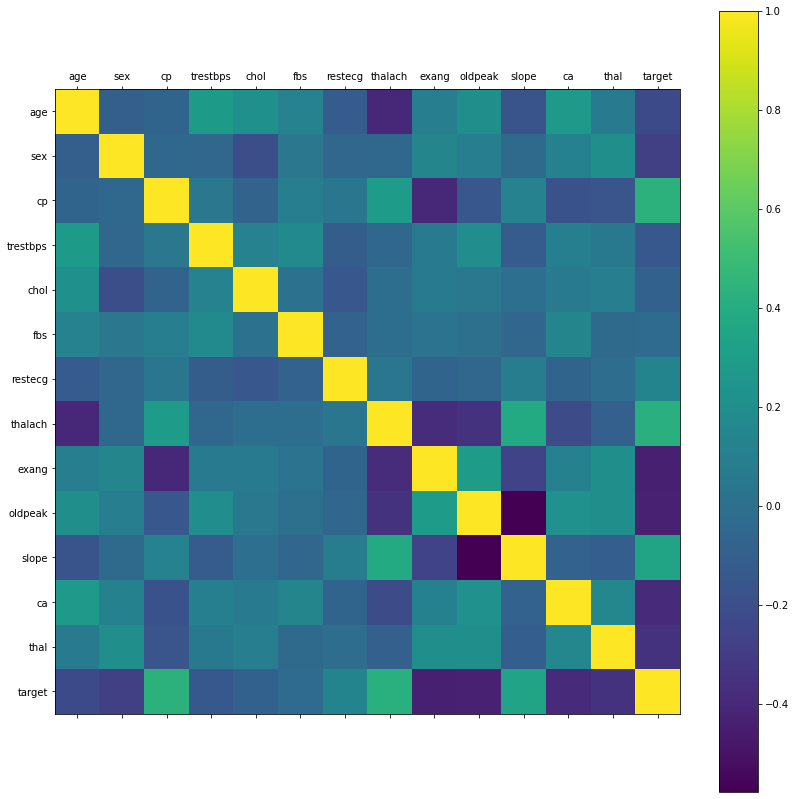

In [275]:
rcParams['figure.figsize'] = 20, 14
plt.matshow(data.corr())
plt.yticks(np.arange(data.shape[1]),data.columns)
plt.xticks(np.arange(data.shape[1]),data.columns)
plt.colorbar()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd1b5514ef0>,
      dtype=object)

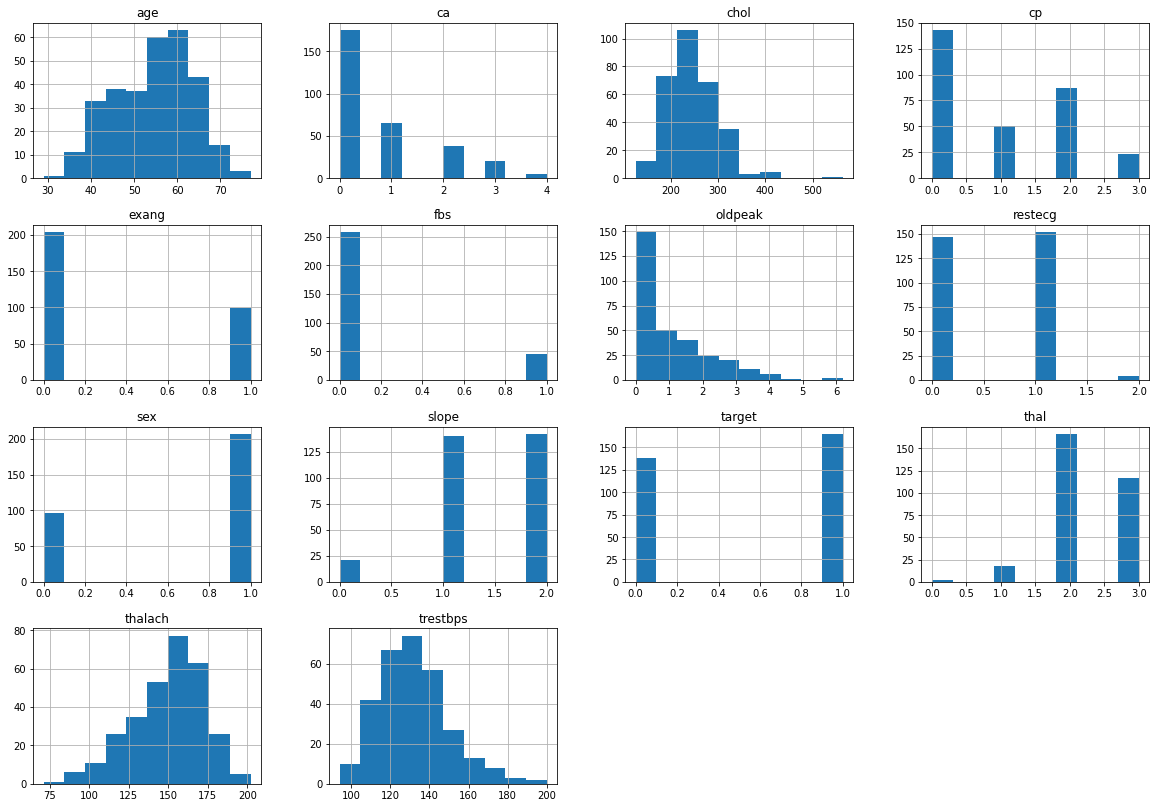

In [276]:
data.hist()

In [0]:
data=pd.get_dummies(data,columns=['sex','cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

In [278]:
data.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,cp_2,cp_3,fbs_0,fbs_1,restecg_0,restecg_1,restecg_2,exang_0,exang_1,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,1,0,1,0,0,0,1,0,1,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,0,1,0,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0


In [0]:
standardScaler = StandardScaler()

In [0]:
columns_to_scale=['age','trestbps', 'chol', 'thalach', 'oldpeak']

In [0]:
data[columns_to_scale]=standardScaler.fit_transform(data[columns_to_scale])

In [0]:
y=data['target']
X=data.drop(['target'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.40,random_state=0) 

**Neural Network   [https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/](https://)**

In [0]:
from keras.models import Sequential
from keras.layers import Dense

In [0]:
model=Sequential()

In [285]:
len(data.columns)

31

In [0]:
model.add(Dense(60,input_dim=30,activation='sigmoid'))
model.add(Dense(20, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

In [0]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [288]:
model.fit(X_train,y_train,epochs=150)

Epoch 1/150
181/181 [==============================] - 0s 546us/step - loss: 0.7101 - accuracy: 0.4365
Epoch 2/150
181/181 [==============================] - 0s 56us/step - loss: 0.6833 - accuracy: 0.6077
Epoch 3/150
181/181 [==============================] - 0s 59us/step - loss: 0.6675 - accuracy: 0.5691
Epoch 4/150
181/181 [==============================] - 0s 53us/step - loss: 0.6568 - accuracy: 0.5635
Epoch 5/150
181/181 [==============================] - 0s 60us/step - loss: 0.6498 - accuracy: 0.5635
Epoch 6/150
181/181 [==============================] - 0s 61us/step - loss: 0.6396 - accuracy: 0.5635
Epoch 7/150
181/181 [==============================] - 0s 67us/step - loss: 0.6295 - accuracy: 0.6133
Epoch 8/150
181/181 [==============================] - 0s 66us/step - loss: 0.6197 - accuracy: 0.7238
Epoch 9/150
181/181 [==============================] - 0s 70us/step - loss: 0.6088 - accuracy: 0.7901
Epoch 10/150
181/181 [==============================] - 0s 80us/step - loss: 0.59

In [0]:
accuracy=model.evaluate(X_test,y_test,verbose=0)

In [0]:
y_pred=model.predict_classes(X_test)

In [0]:
from sklearn.metrics import accuracy_score

In [292]:
accuracy_score(y_test,y_pred)

0.819672131147541

**Linear Regression**

In [0]:
from sklearn.linear_model import LogisticRegression

In [0]:
reg=LogisticRegression()

In [295]:
reg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [296]:
reg.score(X_test,y_test)

0.8114754098360656

**Support Vector Classifier**

In [0]:
from sklearn.svm import SVC

In [0]:
svc_scores=[]
kernels=['linear','poly','rbf','sigmoid']

In [0]:
for i in range(len(kernels)):
  svc_classifier=SVC(kernel=kernels[i])
  svc_classifier.fit(X_train,y_train)
  svc_scores.append(svc_classifier.score(X_test,y_test))

Text(0.5, 1.0, 'Support Vector Classifier scores for different kernels')

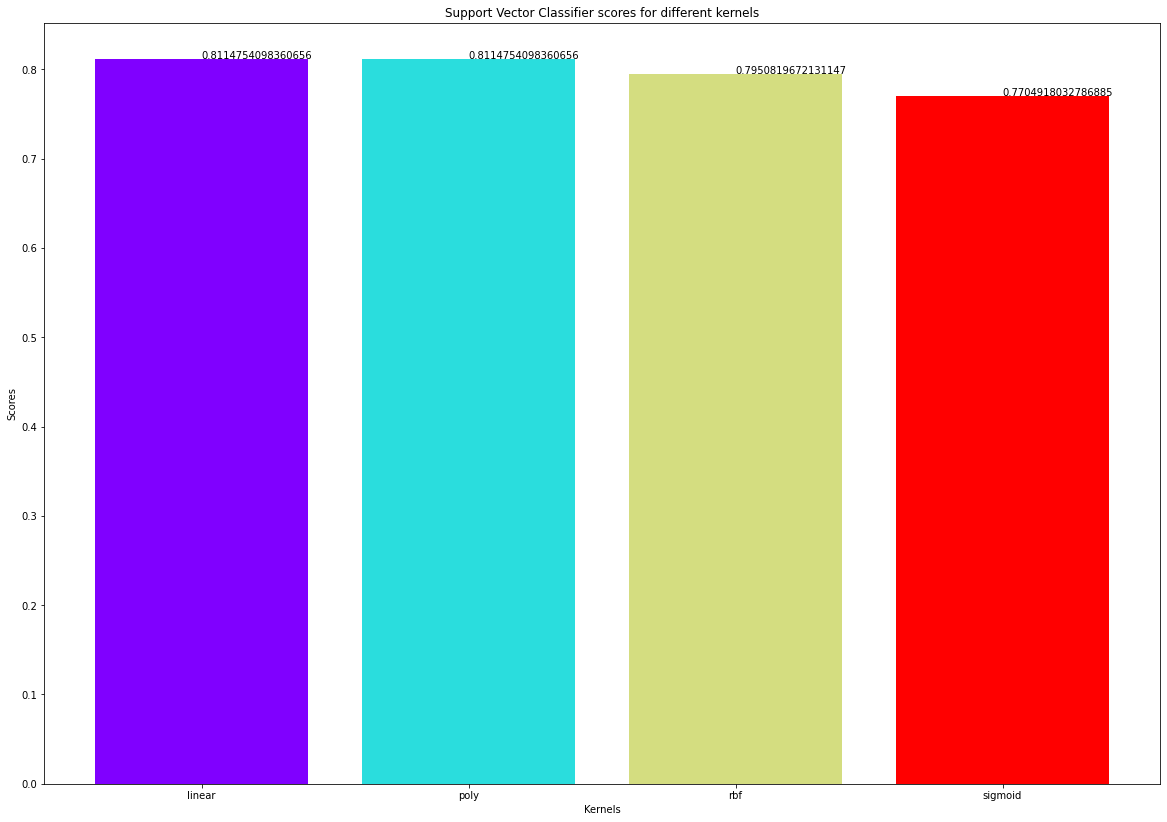

In [300]:
colors = rainbow(np.linspace(0, 1, len(kernels)))
plt.bar(kernels, svc_scores, color = colors)
for i in range(len(kernels)):
    plt.text(i, svc_scores[i], svc_scores[i])
plt.xlabel('Kernels')
plt.ylabel('Scores')
plt.title('Support Vector Classifier scores for different kernels')

**CONCLUSION**

Accuracy of the model using following ML Models


*   Neural Network (Architecture:30-60-20-1) = 81.96%
*   Linear Regression: 81.14%
*   SVM (Kernels): 
               81.14% (Linear Kernel
               81.14% (Poly kernel)
               79.51% (rbf Kernel)
               77.05% (Sigmoid Kernel)